# The Word Championship League of Legend 2019 analyze

### Summary

Using League of legend worlds championship 2019 data, the result from analysis from this report shows that:
- The most popular champion of this competition is Pantheon with 100% participation in pick and ban phase and was ban out 118 from 119 games.
- Kai'Sa, Lee sin, Nautilus, Gangplank, and Ryze are most pick for ADC, Jungle, Support, Top, and Middle position in order.
- Kai'Sa is the champion that was played by the most variety of player and team, second is Xayah and both are in ADC position.

### Data preparation

In [450]:
# import library
import pandas as pd

In [451]:
# read csv file
data_champion=pd.read_csv("data/wc_champions.csv",index_col=0)
data_match=pd.read_csv("data/wc_matches.csv",index_col=0)
data_player=pd.read_csv("data/wc_players.csv",index_col=0)

#### data_champion

In [452]:
# seperate win and lose of win_lose_x_min into 2 seperate columns
data_champion[['win_less_25_min', 'lose_less_25_min']] = data_champion['win_lose_less_25_min'].str.split('-', 1, expand=True)
data_champion[['win_25_30_min', 'lose_25_30_min']] = data_champion['win_lose_25_to_30_min'].str.split('-', 1, expand=True)
data_champion[['win_30_35_min', 'lose_30_35_min']] = data_champion['win_lose_30_35_min'].str.split('-', 1, expand=True)
data_champion[['win_35_40_min', 'lose_35_40_min']] = data_champion['win_lose_35_40_min'].str.split('-', 1, expand=True)
data_champion[['win_40_45_min', 'lose_40_45_min']] = data_champion['win_lose_40_45_min'].str.split('-', 1, expand=True)
data_champion[['win_more_45_min', 'lose_more_45_min']] = data_champion['win_lose_more_45_min'].str.split('-', 1, expand=True)
data_champion.drop(columns=['win_lose_less_25_min','win_lose_25_to_30_min','win_lose_30_35_min','win_lose_35_40_min','win_lose_40_45_min',\
    'win_lose_more_45_min'],inplace=True)
data_champion.head()

,champion,sum_total,win_total,lose_total,winrate_total,sum_blue_side,win_blue_side,lose_blue_side,winrate_blue_side,sum_red_side,...,win_25_30_min,lose_25_30_min,win_30_35_min,lose_30_35_min,win_35_40_min,lose_35_40_min,win_40_45_min,lose_40_45_min,win_more_45_min,lose_more_45_min
1,Kai'Sa,71,37,34,52%,30,15,15,50%,41,...,15,6,12,14,4,7,3,2,1,0
2,Lee Sin,58,30,28,52%,21,11,10,52%,37,...,8,7,9,11,6,4,5,3,0,1
3,Xayah,57,35,22,61%,33,21,12,64%,24,...,9,4,16,7,3,6,2,3,2,0
4,Nautilus,52,28,24,54%,27,17,10,63%,25,...,6,5,9,10,7,4,3,2,2,0
5,Gragas,49,32,17,65%,26,16,10,62%,23,...,7,6,10,7,6,1,6,0,1,1


In [453]:
# remove symbol from data_champion
symbol_remove='%'
column_to_remove_symbol=['winrate_total','winrate_blue_side','winrate_red_side','winrate_less_25_min','winrate_25_30_min','winrate_30_35_min',\
    'winrate_35_40_min','winrate_40_45_min','winrate_more_45_min']
for col in column_to_remove_symbol:
    data_champion[col]=data_champion[col].apply(lambda x: x.replace(symbol_remove, ""))
data_champion.head()

,champion,sum_total,win_total,lose_total,winrate_total,sum_blue_side,win_blue_side,lose_blue_side,winrate_blue_side,sum_red_side,...,win_25_30_min,lose_25_30_min,win_30_35_min,lose_30_35_min,win_35_40_min,lose_35_40_min,win_40_45_min,lose_40_45_min,win_more_45_min,lose_more_45_min
1,Kai'Sa,71,37,34,52,30,15,15,50,41,...,15,6,12,14,4,7,3,2,1,0
2,Lee Sin,58,30,28,52,21,11,10,52,37,...,8,7,9,11,6,4,5,3,0,1
3,Xayah,57,35,22,61,33,21,12,64,24,...,9,4,16,7,3,6,2,3,2,0
4,Nautilus,52,28,24,54,27,17,10,63,25,...,6,5,9,10,7,4,3,2,2,0
5,Gragas,49,32,17,65,26,16,10,62,23,...,7,6,10,7,6,1,6,0,1,1


In [454]:
# data_champion edit type of seperate + % columns
data_champion[['winrate_total','winrate_blue_side','winrate_red_side','winrate_less_25_min','winrate_25_30_min','winrate_30_35_min',\
    'winrate_35_40_min','winrate_40_45_min','winrate_more_45_min','win_less_25_min', 'lose_less_25_min','win_25_30_min', 'lose_25_30_min',\
    'win_30_35_min', 'lose_30_35_min','win_35_40_min', 'lose_35_40_min','win_40_45_min', 'lose_40_45_min','win_more_45_min', \
    'lose_more_45_min']]\
    =data_champion[['winrate_total','winrate_blue_side','winrate_red_side','winrate_less_25_min','winrate_25_30_min','winrate_30_35_min',\
    'winrate_35_40_min','winrate_40_45_min','winrate_more_45_min','win_less_25_min', 'lose_less_25_min','win_25_30_min', 'lose_25_30_min',\
    'win_30_35_min', 'lose_30_35_min','win_35_40_min', 'lose_35_40_min','win_40_45_min', 'lose_40_45_min','win_more_45_min', \
    'lose_more_45_min']].astype('int64')
data_champion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 1 to 98
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   champion              98 non-null     object
 1   sum_total             98 non-null     int64 
 2   win_total             98 non-null     int64 
 3   lose_total            98 non-null     int64 
 4   winrate_total         98 non-null     int64 
 5   sum_blue_side         98 non-null     int64 
 6   win_blue_side         98 non-null     int64 
 7   lose_blue_side        98 non-null     int64 
 8   winrate_blue_side     98 non-null     int64 
 9   sum_red_side          98 non-null     int64 
 10  win_red_side          98 non-null     int64 
 11  lose_red_side         98 non-null     int64 
 12  winrate_red_side      98 non-null     int64 
 13  matches_less_25_min   98 non-null     int64 
 14  winrate_less_25_min   98 non-null     int64 
 15  matches_25_to_30_min  98 non-null     int6

#### data_match

In [455]:
# drop team 1,2 in data_match
data_match.drop(columns=['team1','team2','pbp_caster','color_caster'],inplace=True)

# convert date column to datetime type
data_match['date']=pd.to_datetime(data_match['date'])
data_match.sort_values(by=['date'])
data_match.head()

,winner,date,mvp,blue,red
0,SK Telecom T1,2019-10-12 12:00:00,Faker,Fnatic,SK Telecom T1
1,Royal Never Give Up,2019-10-12 13:00:00,Langx,Royal Never Give Up,Clutch Gaming
2,Invictus Gaming,2019-10-12 14:00:00,Rookie,Invictus Gaming,ahq eSports Club
3,Team Liquid,2019-10-12 15:00:00,Impact,DAMWON Gaming,Team Liquid
4,J Team,2019-10-12 16:00:00,FoFo,J Team,FunPlus Phoenix


#### data_player

In [456]:
# clear data_player in column that data lost
data_player.drop(columns=['heraldtime','visiblewardclearrate','invisiblewardclearrate'],inplace=True)
data_player.head(20)
data_player.loc[:20,['ft']]

,ft
0,0
1,0
2,0
3,0
4,0
5,1
6,1
7,1
8,1
9,1


date data is not correct. When the data convert to date type, the different number convert to same date. So, I decide to keep it the same to use seperate each game correctly.

In [457]:
# seperate data individual and team
data_player_ind=data_player.loc[:,['date','side','position','player','team','champion','k','d','a','doubles','triples','quadras','pentas','fb'\
    ,'fbassist','fbvictim','kpm','okpm','fd','elementals','oppelementals','firedrakes','waterdrakes','earthdrakes','airdrakes','elders',\
    'oppelders','dmgtochamps','dmgtochampsperminute','dmgshare','earnedgoldshare','wards','wpm','wardshare','wardkills','wcpm','visionwards',\
    'visionwardbuys','totalgold','earnedgpm','goldspent','gspd','minionkills','monsterkills','monsterkillsownjungle','monsterkillsenemyjungle'\
    ,'cspm','goldat10','oppgoldat10','gdat10','goldat15','oppgoldat15','gdat15','xpat10','oppxpat10','xpdat10','csat10','oppcsat10','csdat10',\
    'csat15','oppcsat15','csdat15']]
data_player_team=data_player.loc[:,['date','side','team','ban1','ban2','ban3','ban4','ban5','gamelength','result','teamkills','teamdeaths',\
    'fbtime','ckpm','fdtime','teamdragkills','oppdragkills','herald','ft','fttime','firstmidouter','firsttothreetowers','teamtowerkills',\
    'opptowerkills','fbaron','fbarontime','teambaronkills','oppbaronkills']]
# in game = ckpm, gamelength, fdtime, fttime, fbarontime
# in team = herald, baron, ft
# in player = fd, sdtime

# del row of each team to 1 row per game
data_player_team.drop_duplicates(['date','team'],inplace=True)

#### Data summary

In [458]:
data_champion.describe()

,sum_total,win_total,lose_total,winrate_total,sum_blue_side,win_blue_side,lose_blue_side,winrate_blue_side,sum_red_side,win_red_side,...,win_25_30_min,lose_25_30_min,win_30_35_min,lose_30_35_min,win_35_40_min,lose_35_40_min,win_40_45_min,lose_40_45_min,win_more_45_min,lose_more_45_min
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,12.244898,6.122449,6.122449,43.877551,6.122449,3.214286,2.908163,40.928571,6.122449,2.908163,...,1.530612,1.530612,2.040816,2.040816,1.173469,1.173469,0.714286,0.714286,0.204082,0.204082
std,14.474336,8.109134,6.670856,27.176880,7.621545,4.477320,3.376959,32.298304,7.529003,4.142032,...,2.364706,1.800367,3.096118,2.689876,1.631049,1.611975,1.130642,0.984415,0.496569,0.429797
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,31.500000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,3.000000,4.000000,50.000000,3.000000,1.000000,2.000000,50.000000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000
75%,15.750000,7.750000,9.000000,56.750000,8.000000,4.000000,4.000000,60.000000,8.750000,4.000000,...,2.000000,3.000000,3.000000,3.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
max,71.000000,37.000000,34.000000,100.000000,33.000000,21.000000,15.000000,100.000000,41.000000,22.000000,...,15.000000,7.000000,16.000000,14.000000,7.000000,7.000000,6.000000,4.000000,2.000000,2.000000


In [459]:
data_match.describe()

C:\Users\baito\AppData\Local\Temp\ipykernel_13184\1438873273.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_match.describe()


,winner,date,mvp,blue,red
count,81,81,81,81,81
unique,23,81,51,24,24
top,DAMWON Gaming,2019-10-12 12:00:00,Humanoid,Clutch Gaming,Splyce
freq,10,1,5,7,7
first,NaN,2019-10-02 11:00:00,NaN,NaN,NaN
last,NaN,2019-10-20 17:00:00,NaN,NaN,NaN


In [460]:
data_player.describe(datetime_is_numeric=True)

,date,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,...,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
count,1190.000000,1190.000000,1190.00000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,...,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.00000,1190.000000,1190.000000,1190.000000
mean,43753.772288,33.292857,0.50000,2.648739,2.656303,5.694958,13.243697,13.281513,0.263025,0.049580,...,0.000000,3663.179832,3663.179832,0.000000,62.232773,62.232773,0.00000,98.593277,98.593277,0.000000
std,9.873367,6.436371,0.50021,2.442815,1.816296,3.923176,6.606145,6.587746,0.570271,0.235737,...,959.166728,813.302361,813.302361,434.627635,29.834510,29.834510,12.63494,47.005745,47.005745,19.068378
min,43740.223889,22.716667,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,-4295.000000,1766.000000,1766.000000,-1470.000000,0.000000,0.000000,-59.00000,1.000000,1.000000,-77.000000
25%,43745.362731,28.483333,0.00000,1.000000,1.000000,3.000000,8.000000,8.000000,0.000000,0.000000,...,-562.000000,3036.250000,3036.250000,-261.750000,50.250000,50.250000,-8.00000,77.000000,77.000000,-13.000000
50%,43752.543368,32.083333,0.50000,2.000000,2.000000,5.000000,13.000000,13.000000,0.000000,0.000000,...,0.000000,3522.000000,3522.000000,0.000000,71.000000,71.000000,0.00000,114.000000,114.000000,0.000000
75%,43758.401227,37.583333,1.00000,4.000000,4.000000,8.000000,18.000000,18.000000,0.000000,0.000000,...,562.000000,4453.000000,4453.000000,261.750000,85.000000,85.000000,8.00000,136.000000,136.000000,13.000000
max,43779.393137,63.416667,1.00000,13.000000,10.000000,22.000000,34.000000,34.000000,4.000000,2.000000,...,4295.000000,5316.000000,5316.000000,1470.000000,111.000000,111.000000,59.00000,171.000000,171.000000,77.000000


In [461]:
number_game=len(data_player.index)/10
print(number_game)
number_player=data_player_ind['player'].nunique()
print(number_player)

119.0
127


I noticed the number of data in data_match is not equal to data_player / 10 (which is number of each game player). My hypothesis is the data_match is not contain data from play-in round.

### Analyze

#### The popular champion

In [462]:
# create data of champion for each position
position_champion=data_player_ind.loc[:,['player','position','champion','team']]

##### champion with highest participation in pick and ban phase

I found result in data_champion that store count of all game the champion was played.

In [463]:
# most play champion
most_pop_champ=data_champion.loc[:,['champion','sum_total']].sort_values('sum_total',ascending=False).set_index('champion')
most_pop_champ.rename(columns={'sum_total':'pick_count'},inplace=True)
most_pop_champ.head(10)

,pick_count
champion,
Kai'Sa,71
Lee Sin,58
Xayah,57
Nautilus,52
Gragas,49
Rakan,43
Gangplank,38
Ryze,36
Akali,35


And I analyze from data_player to find the champion that was ban in each game.

In [464]:
# champion with most ban
ban_champion=pd.DataFrame(data=pd.concat([data_player_team['ban1'],data_player_team['ban2'],data_player_team['ban3'],data_player_team['ban4'],data_player_team['ban5']],ignore_index=True),columns=['champion'])
ban_champion=ban_champion.groupby(['champion']).size().sort_values(ascending=False).to_frame('ban_count')
ban_champion.head(10)

,ban_count
champion,
Pantheon,118
Qiyana,86
Syndra,66
Renekton,61
Akali,54
Xayah,45
LeBlanc,44
Kayle,43
Gragas,34


Pantheon was ban in 118 from 119 game. Wow, such a strong meta champion. Now, I am curious about which champion has high of both pick and ban.

In [465]:
# sum pick and ban count
most_pop_champ=most_pop_champ.merge(ban_champion,how='outer',left_index=True,right_index=True).fillna(0)
most_pop_champ['pick_ban']=most_pop_champ['pick_count']+most_pop_champ['ban_count']
most_pop_champ.sort_values(['pick_ban'],ascending=False).head(10)

# cal ratio of pick and ban for all games
most_pop_champ['pick_ban_rate']=most_pop_champ['pick_ban']/number_game
most_pop_champ.sort_values(['pick_ban_rate'],ascending=False,inplace=True)
most_pop_champ.head(10)

,pick_count,ban_count,pick_ban,pick_ban_rate
champion,,,,
Pantheon,1.0,118.0,119.0,1.000000
Qiyana,23.0,86.0,109.0,0.915966
Xayah,57.0,45.0,102.0,0.857143
Syndra,29.0,66.0,95.0,0.798319
Renekton,33.0,61.0,94.0,0.789916
Akali,35.0,54.0,89.0,0.747899
Kai'Sa,71.0,17.0,88.0,0.739496
Gragas,49.0,34.0,83.0,0.697479
Nautilus,52.0,25.0,77.0,0.647059


<AxesSubplot:title={'center':'The most pick and ban champion in League of Legend Worlds Championship 2019'}, ylabel='champion'>

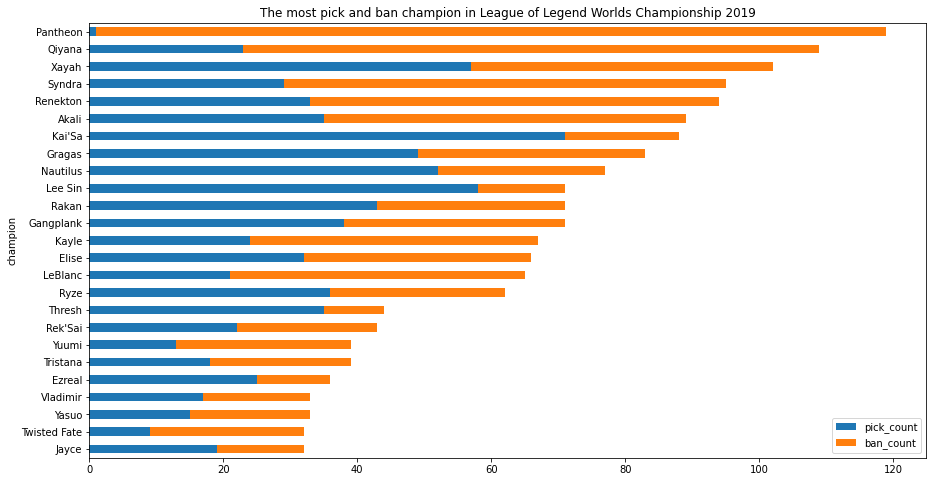

In [466]:
most_pop_champ=most_pop_champ[::-1]
most_pop_champ.iloc[-25:,:2].plot.barh(stacked=True, figsize=(15,8),title='The most pick and ban champion in League of Legend Worlds Championship 2019',ylabel='Number')

The result is showing some interesting data. Pantheon has the highest participation time with 100% pick and ban, and was ban out 118 from 119 games. The second one is Qiyana with 91.6% participation, this champion is also the second place of most ban champion. From graph I noticed the champion below Ryze was pick and ban less than a half of the game.

##### champion pick in each position

The previous result not have position data so may be the champion was not play on the same position.

In [467]:
most_champ_position=position_champion.groupby(['position','champion'])['champion'].count().to_frame(name = 'pick_count').sort_values(by=\
    'pick_count',ascending=False)
most_champ_position['ratio_all_game']=most_champ_position['pick_count']/number_game
most_champ_position.head(10)

pick_count  ratio_all_game
position champion                             
ADC      Kai'Sa             71        0.596639
Jungle   Lee Sin            57        0.478992
ADC      Xayah              56        0.470588
Support  Nautilus           48        0.403361
         Rakan              42        0.352941
Jungle   Gragas             40        0.336134
Top      Gangplank          38        0.319328
Support  Thresh             35        0.294118
Jungle   Elise              32        0.268908
Middle   Ryze               29        0.243697

After group data champion with position pick in game. The result slighly different, we can see some champion with high number pick is not in the same position such as Akali that out of top 10 right now.
So I continue to pick only most pick in each position and find the ratio of pick rate per all game.

In [468]:
# top played champion in each position
most_champ_position=position_champion.groupby(['position','champion'])['champion'].count().to_frame(name = 'pick_count').sort_values(by=['position',\
    'pick_count'],ascending=[True,False]).reset_index().drop_duplicates(subset='position', keep='first').set_index('position').sort_values\
    ('pick_count',ascending=False)
most_champ_position['ratio_all_game']=most_champ_position['pick_count']/number_game
most_champ_position

,champion,pick_count,ratio_all_game
position,,,
ADC,Kai'Sa,71,0.596639
Jungle,Lee Sin,57,0.478992
Support,Nautilus,48,0.403361
Top,Gangplank,38,0.319328
Middle,Ryze,29,0.243697


I find Kai'Sa has the almost 60% pick rate for all games.

##### variety of pick team

The strong champion is need to have several team pick it, not only the same team every game.

In [469]:
champion_team=data_player_ind.groupby('champion')['player','team'].nunique().rename(columns={'player':'player_count','team':'team_count'}).sort_values('player_count',ascending=False)
champion_team.head(10)

C:\Users\baito\AppData\Local\Temp\ipykernel_13184\4200748090.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  champion_team=data_player_ind.groupby('champion')['player','team'].nunique().rename(columns={'player':'player_count','team':'team_count'}).sort_values('player_count',ascending=False)


,player_count,team_count
champion,,
Kai'Sa,22,21
Xayah,21,20
Nautilus,21,19
Akali,20,17
Lee Sin,18,18
Gragas,18,13
Renekton,17,15
Gangplank,16,16
Ryze,16,12


Kai'sa is the most pick champion in both number and variety of player. But number of player and team is not the same in almost all champion. So, I decided to seperate data of champion variety pick into each position play.

In [470]:
# most team pick champion pick of each position
champion_team_pos=position_champion.groupby(['position','champion']).nunique().rename(columns={'player':'player_count','team':'team_count'}).sort_values(by='player_count',ascending=False)
champion_team_pos.head(10)

player_count  team_count
position champion                           
ADC      Kai'Sa               22          21
         Xayah                21          20
Support  Nautilus             20          19
Jungle   Lee Sin              18          18
Top      Gangplank            16          16
Support  Rakan                15          15
Jungle   Elise                15          14
Support  Thresh               15          14
Top      Renekton             14          13
Jungle   Gragas               14          13

So, I noticed a bit different between two tables. Champion was popular in more than 1 position such as Akali, Gragas, Renekton, Ryze, and Kayle has lower placed in table 2 compared with table 1. And some team have substitude this year, we could noticed slightly decrease value from player to team column.

#### The best team

Even though, FunPlus Phoenix is the champion of 2019 worlds championship League of Legend, I still curious about other teams statistic. May be we can see some interesting information.

##### Team with most sth

First, I found the team with most win game.

In [471]:
# select columns from data_player_team to analyse
best_team=data_player_team[['team','result']].groupby('team').agg(['count','sum'])
best_team.columns=["_".join(a) for a in best_team.columns.to_flat_index()]
best_team.rename(columns={'result_count':'game_count','result_sum':'win_count'},inplace=True)
best_team['win_rate']=best_team['win_count']/best_team['game_count']
best_team.sort_values(['win_count','win_rate'],ascending=False)

,game_count,win_count,win_rate
team,,,
Funplus Phoenix,18,14,0.777778
Damwon Gaming,18,13,0.722222
G2 Esports,18,11,0.611111
Splyce,20,11,0.550000
SK Telecom T1,14,9,0.642857
Invictus Gaming,14,8,0.571429
Griffin,11,7,0.636364
Clutch Gaming,13,6,0.461538
Hong Kong Attitude,14,6,0.428571


As we predicted the team with most win is FunPlus Phoenix. But the second place is not G2 Esport who played in the final game but Damwon Gaming who lose in Quarterfinals when they face G2 Esport. Danwon Gaming start this tournaments in play-in stage this leads Danwon Gaming to have high number of games.

Next, I want to find the team with most kills.

In [477]:
# create data to investigate more in data_player with summary
data_player_team_sum=data_player_team.groupby('team')['teamkills','teamdeaths','teamdragkills','oppdragkills','herald','teamtowerkills',\
    'opptowerkills','teambaronkills','oppbaronkills'].sum()
data_player_team_sum.sort_values('teamkills',ascending=False)[['teamkills','teamdeaths']]

C:\Users\baito\AppData\Local\Temp\ipykernel_13184\1318937434.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_player_team_sum=data_player_team.groupby('team')['teamkills','teamdeaths','teamdragkills','oppdragkills','herald','teamtowerkills',\


,teamkills,teamdeaths
team,,
Funplus Phoenix,335,199
Splyce,298,265
Damwon Gaming,273,188
G2 Esports,242,259
SK Telecom T1,217,172
Invictus Gaming,209,227
Griffin,171,105
Clutch Gaming,169,165
Unicorns of Love,137,172


FunPlus Phoenix is the team with highest kills of this tournament. Their games seem to be aggressive since they kills is higher than second place about 50 champions.

In [478]:
data_player_team_sum.sort_values('teamdragkills',ascending=False)[['teamdragkills','oppdragkills']]

,teamdragkills,oppdragkills
team,,
Damwon Gaming,57,23
Funplus Phoenix,52,22
Splyce,44,46
SK Telecom T1,44,22
G2 Esports,37,43
Griffin,33,16
Clutch Gaming,33,28
Invictus Gaming,27,36
Hong Kong Attitude,25,40


Damwon Gaming has the highest drag kills since he doing great in play-in round. And Funplus Phoenix is on the second place.

In [480]:
data_player_team_sum.sort_values('teamtowerkills',ascending=False)[['teamtowerkills','opptowerkills']]

,teamtowerkills,opptowerkills
team,,
Damwon Gaming,143,68
Funplus Phoenix,140,71
Splyce,133,116
G2 Esports,124,104
SK Telecom T1,106,73
Invictus Gaming,92,84
Griffin,81,50
Hong Kong Attitude,81,101
Clutch Gaming,79,76


Damwon Gaming stands in first place again with Funplus Phoenix is second place in tower kills. But not much different between 2 teams.

In [481]:
data_player_team_sum.sort_values('teambaronkills',ascending=False)[['teambaronkills','oppbaronkills']]

,teambaronkills,oppbaronkills
team,,
Splyce,19,14
Funplus Phoenix,18,6
Damwon Gaming,17,6
SK Telecom T1,16,7
Invictus Gaming,10,8
G2 Esports,10,16
Clutch Gaming,9,11
Hong Kong Attitude,9,8
Griffin,8,7


Spylce is in the first place in baron kills but they also lost a lot of baron too. Funplus Phoenix is on the second place again but they are control baron a lot better compare to Splyce team.

##### the fastest team

In [ ]:
#data_player_team['date','side','team','gamelength','result','teamkills','teamdeaths',\
#    'fbtime','fdtime','teamdragkills','oppdragkills','herald','ft','fttime','firstmidouter','firsttothreetowers','teamtowerkills',\
#    'opptowerkills','fbaron','fbarontime','teambaronkills','oppbaronkills']
# in game = ckpm, gamelength, fdtime, fttime, fbarontime
# in team = herald, baron, ft
# in player = fd, sdtime
data_player_team_avg=data_player_team.groupby('team')['gamelength'].mean()
best_team

TypeError: DataFrame.assign() takes 1 positional argument but 2 were given

#### The best player